1.Upload the datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
import pandas as pd
datadir = "/content/"
train_df = pd.read_csv(datadir+'train.csv.zip')

2.2 Initial Analysis On Our Datasets

In [ ]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
train_df.shape

(159571, 8)

In [ ]:
label_columns= ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
counts=train_df[label_columns].sum()
count_non=len(train_df['comment_text'])-sum(counts)
counts['non_toxic']=count_non
label_columns.append('non_toxic')
label_column= ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult','identity_hate']
train_df['non_toxic'] = (train_df[label_column].sum(axis=1) == 0).astype(int)
print(train_df)

                      id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        toxic  severe_toxic  obscene  threat  insul

In [ ]:
train_df.isnull().sum()

,0
id,0
comment_text,0
toxic,0
severe_toxic,0
obscene,0
threat,0
insult,0
identity_hate,0
non_toxic,0


VISUALIZATION



3.1 Toxic vs Non-Toxic Comments Plot

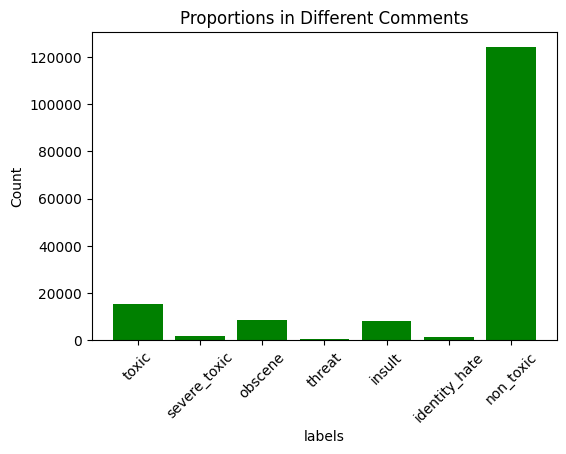

toxic             15294
severe_toxic       1595
obscene            8449
threat              478
insult             7877
identity_hate      1405
non_toxic        124473
dtype: int64


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
#Graphical representation of the Toxic column values (Toxic vs Non-Toxic Comments) distribution
plt.figure(figsize = (6, 4))
plt.bar(label_columns,counts, color = ['green'])
plt.title('Proportions in Different Comments')
plt.ylabel('Count')
plt.xlabel('labels')
plt.xticks(rotation = 45)
plt.show()
print(counts)

3.2 Wordcloud for each type of toxic Comment

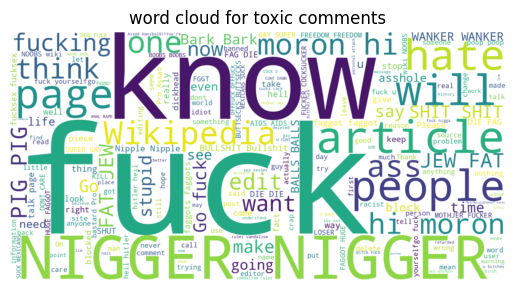

In [ ]:
from wordcloud import WordCloud
#Toxic Comments
toxic_comments = ''.join(train_df[train_df['non_toxic']==0]['comment_text'])
toxic_words = WordCloud(width = 1600, height = 800, background_color = "white").generate(toxic_comments)
plt.imshow(toxic_words, interpolation = 'bilinear')
plt.axis("off")
plt.title("word cloud for toxic comments")
plt.show()

3.3 Wordcloud for Non-Toxic Comments

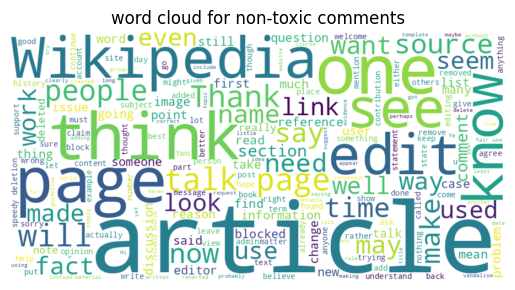

In [ ]:
#Non-Toxic
non_toxic_comments = ' '.join(train_df[train_df['non_toxic'] == 1]['comment_text'])
non_toxic_words = WordCloud(width = 900, height = 450, background_color = "white").generate(non_toxic_comments)
plt.imshow(non_toxic_words, interpolation = 'bilinear')
plt.axis("off")
plt.title("word cloud for non-toxic comments")
plt.show()

EXPLORATORY DATA ANALYSIS (EDA)

4.1 Text Preprocessing

In [ ]:
#"re" is for regular expressions and text processing.
import re
#Cleaning the comment texts
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re'", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub("\W", " ", text)
    text = re.sub("\s+", " ", text)
    text = text.strip(" ")
    return text
train_df['comment_text'] = train_df['comment_text'].map(lambda cleaned : clean_text(cleaned))


In [ ]:
train_df.head()
print("Missing values:", train_df['comment_text'].isnull().sum())
train_df['comment_text'] = train_df['comment_text'].fillna("")
train_df['comment_text'] = train_df['comment_text'].apply(str)
print(train_df['comment_text'].apply(type).value_counts())
texts = train_df['comment_text'].tolist()
print(type(texts))  # 应输出 <class 'list'>
print(type(texts[0]))  # 应输出 <class 'str'>
print(texts[:5])


Missing values: 0
comment_text
<class 'str'>    159571
Name: count, dtype: int64
<class 'list'>
<class 'str'>
['explanation why the edits made under my username hardcore metallica fan were reverted they were not vandalisms just closure on some gas after i voted at new york dolls fac and please do not remove the template from the talk page since i am retired now 89 205 38 27', 'd aww he matches this background colour i am seemingly stuck with thanks talk 21 51 january 11 2016 utc', 'hey man i am really not trying to edit war it just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info', 'more i cannot make any real suggestions on improvement i wondered if the section statistics should be later on or a subsection of types of accidents i think the references may need tidying so that they are all in the exact same format ie date format etc i can do that later on if n

4.2 Multi-Hot Encoding

In [ ]:
def multi_hot_encode(row, label_columns):
    return [row[label] for label in label_columns]
train_df["multi_hot"] = train_df.apply(lambda row: multi_hot_encode(row, label_columns), axis=1)
print(train_df[["comment_text", "multi_hot"]])

                                             comment_text  \
0       explanation why the edits made under my userna...   
1       d aww he matches this background colour i am s...   
2       hey man i am really not trying to edit war it ...   
3       more i cannot make any real suggestions on imp...   
4       you sir are my hero any chance you remember wh...   
...                                                   ...   
159566  and for the second time of asking when your vi...   
159567  you should be ashamed of yourself that is a ho...   
159568  spitzer umm theres no actual article for prost...   
159569  and it looks like it was actually you who put ...   
159570  and i really do not think you understand i cam...   

                    multi_hot  
0       [0, 0, 0, 0, 0, 0, 1]  
1       [0, 0, 0, 0, 0, 0, 1]  
2       [0, 0, 0, 0, 0, 0, 1]  
3       [0, 0, 0, 0, 0, 0, 1]  
4       [0, 0, 0, 0, 0, 0, 1]  
...                       ...  
159566  [0, 0, 0, 0, 0, 0, 1]  
159567  [0,

In [ ]:
Y=train_df['multi_hot'].tolist()
Y=np.array(Y)
print(Y)

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


4.3 Text Processing Using BERT

In [ ]:
import torch
import numpy as np
from transformers import BertTokenizer, BertModel, DataCollatorWithPadding
from datasets import Dataset
from torch.utils.data import DataLoader

# 确保train_df中comment_text列为字符串，且无空值
train_df["comment_text"] = train_df["comment_text"].astype(str)
train_df["comment_text"] = train_df["comment_text"].fillna("")

device = "cuda" if torch.cuda.is_available() else "cpu"
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased').to(device)

def preprocess_function(examples):
    # 这里不指定 return_tensors="pt"，只返回python列表，由collator再转换
    return tokenizer(
        examples["comment_text"],
        truncation=True,
        # 让 DataCollatorWithPadding 自动做padding
        max_length=512
    )

# 从 DataFrame 创建 Dataset
train_dataset = Dataset.from_pandas(train_df)

# 对数据集进行分词预处理
# 使用 remove_columns 来移除原始列，只保留 tokenizer 生成的列
encoded_dataset = train_dataset.map(preprocess_function, batched=True, remove_columns=train_dataset.column_names)

# 此时encoded_dataset中仅有 input_ids、attention_mask 等列
# 使用 DataCollatorWithPadding 动态对每个batch进行padding并转张量
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="pt")

# 使用 DataLoader 加载数据
dataloader = DataLoader(encoded_dataset, batch_size=8, shuffle=False, collate_fn=data_collator)

def get_bert_embeddings(dataloader, model, device="cpu"):
    model.eval()
    embeddings = []
    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            # 取 [CLS] 向量作为句子表示
            batch_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
            embeddings.append(batch_embeddings)
    return np.vstack(embeddings)

X = get_bert_embeddings(dataloader, model, device)
print("BERT embeddings shape:", X.shape)


Map:   0%|          | 0/159571 [00:00<?, ? examples/s]

BERT embeddings shape: (159571, 768)


In [ ]:

import pandas as pd
ids = train_df["id"].values
column_names = [f"dim_{i}" for i in range(X.shape[1])]
df_emb = pd.DataFrame(X, columns=column_names)
df_embeddings = pd.concat([pd.DataFrame({"id": ids}), df_emb], axis=1)
df_embeddings.to_csv("bert_embeddings.csv", index=False)
print("Embeddings saved to bert_embeddings.csv")


Embeddings saved to bert_embeddings.csv


In [ ]:
from google.colab import files
files.download('bert_embeddings.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

4.4 Over-Sampling Using MLSMOTE

In [ ]:
import numpy as np
import pandas as pd
import random
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix, vstack
from joblib import Parallel, delayed

def nearest_neighbour(X):
    nbs = NearestNeighbors(n_neighbors=5, metric='euclidean', algorithm='brute').fit(X)
    _, indices = nbs.kneighbors(X)
    return indices

def generate_sample(reference, indices2, X, y):
    neighbour = random.choice(indices2[reference, 1:])
    all_point = indices2[reference]
    nn_labels = y[all_point]
    label_sum = np.sum(nn_labels, axis=0)
    synthetic_label = np.array([1 if val > 2 else 0 for val in label_sum])
    ratio = random.random()
    gap = X[reference] - X[neighbour]
    synthetic_sample = X[reference] + ratio * gap
    return synthetic_sample, synthetic_label

def MLSMOTE_only_new(X, y, n_samples, n_jobs=-1):
    indices2 = nearest_neighbour(X)
    n = len(indices2)
    results = Parallel(n_jobs=n_jobs)(
        delayed(generate_sample)(random.randint(0, n - 1), indices2, X, y) for _ in range(n_samples)
    )

    new_X, new_y = zip(*results)
    new_X = np.vstack([x.toarray() if hasattr(x, 'toarray') else x for x in new_X])
    new_X = csr_matrix(new_X)
    new_y = np.array(new_y)
    return new_X, new_y

if __name__ == "__main__":
    non_toxic_index = label_columns.index("non_toxic")
    target_count = 100000
    non_toxic_mask = (Y[:, non_toxic_index]==1)
    non_toxic_indices = np.where(non_toxic_mask)[0]
    other_indices=np.where(~non_toxic_mask)[0]
    np.random.seed(42)
    sampled_non_toxic_indices = np.random.choice(non_toxic_indices,size=target_count, replace=False)
    final_indices = np.concatenate([other_indices, sampled_non_toxic_indices])

    X = X[final_indices]
    Y = Y[final_indices]
    from scipy.sparse import csr_matrix
    X = csr_matrix(X)
    label_count=Y.sum(axis=0)
    non_toxic_count = label_counts[non_toxic_index]
    print("Original label counts:")
    print(pd.Series(label_counts, index=label_columns))

    initial_target_ratio = 0.3
    final_target_ratio = 0.8
    rounds = 3

    target_ratios = np.linspace(initial_target_ratio, final_target_ratio, rounds)

    X_current = X
    Y_current = Y

    max_synthetic = 100000
    synthetic_generated_so_far = 0
    n_jobs = -1

    for r, tr in enumerate(target_ratios, start=1):
        current_label_counts = Y_current.sum(axis=0)
        target_count = int(non_toxic_count * tr)
        print(f"\n=== Round {r}/{rounds}, target ratio = {tr:.2f} (target_count={target_count}) ===")
        for i, label in enumerate(label_columns):
            if i == non_toxic_index:
                continue
            current_count = current_label_counts[i]
            if current_count < target_count:
                deficit_needed = int(target_count - current_count)
                available_quota = max_synthetic - synthetic_generated_so_far
                if available_quota <= 0:
                    print("No more synthetic samples can be generated. Reached max limit.")
                    break

                deficit = min(deficit_needed, available_quota)
                print(f"Label '{label}' Current: {current_count}, Need: {deficit_needed}, Using: {deficit}")


                subset_mask = (Y_current[:, i] == 1)
                X_subset = X_current[subset_mask]
                Y_subset = Y_current[subset_mask]

                if X_subset.shape[0] <= 1:
                    print(f"Not enough samples for '{label}', even without filtering. Consider lowering target.")
                    continue

                X_new, Y_new = MLSMOTE_only_new(X_subset, Y_subset, n_samples=deficit)
                X_current = vstack([X_current, X_new])
                Y_current = np.vstack([Y_current, Y_new])
                synthetic_generated_so_far += deficit


                current_label_counts = Y_current.sum(axis=0)
                new_count = current_label_counts[i]
                if new_count >= target_count:
                    print(f"Label '{label}' reached or exceeded the target of this round.")
                else:
                    print(f"Label '{label}' still not at the round target. Multiple iterations might be needed.")

                if synthetic_generated_so_far >= max_synthetic:
                    print(f"Reached the max synthetic limit of {max_synthetic}, stopping further generation.")
                    break

        print(f"\nAfter round {r}, label counts:")
        print(pd.Series(Y_current.sum(axis=0), index=label_columns))

        if synthetic_generated_so_far >= max_synthetic:
            break

    final_counts = Y_current.sum(axis=0)
    print("\nFinal label counts after multiple rounds:")
    print(pd.Series(final_counts, index=label_columns))
    print(f"Total synthetic generated: {synthetic_generated_so_far}")


Original label counts:
toxic             15294
severe_toxic       1595
obscene            8449
threat              478
insult             7877
identity_hate      1405
non_toxic        100000
dtype: int64

=== Round 1/3, target ratio = 0.30 (target_count=30000) ===
Label 'toxic' Current: 15294, Need: 14706, Using: 14706
Label 'toxic' reached or exceeded the target of this round.
Label 'severe_toxic' Current: 2477, Need: 27523, Using: 27523
Label 'severe_toxic' reached or exceeded the target of this round.
Label 'threat' Current: 1236, Need: 28764, Using: 28764
Label 'threat' reached or exceeded the target of this round.
Label 'identity_hate' Current: 7848, Need: 22152, Using: 22152
Label 'identity_hate' reached or exceeded the target of this round.

After round 1, label counts:
toxic            108252
severe_toxic      65279
obscene           88061
threat            39568
insult            85385
identity_hate     30000
non_toxic        100000
dtype: int64

=== Round 2/3, target ratio = 

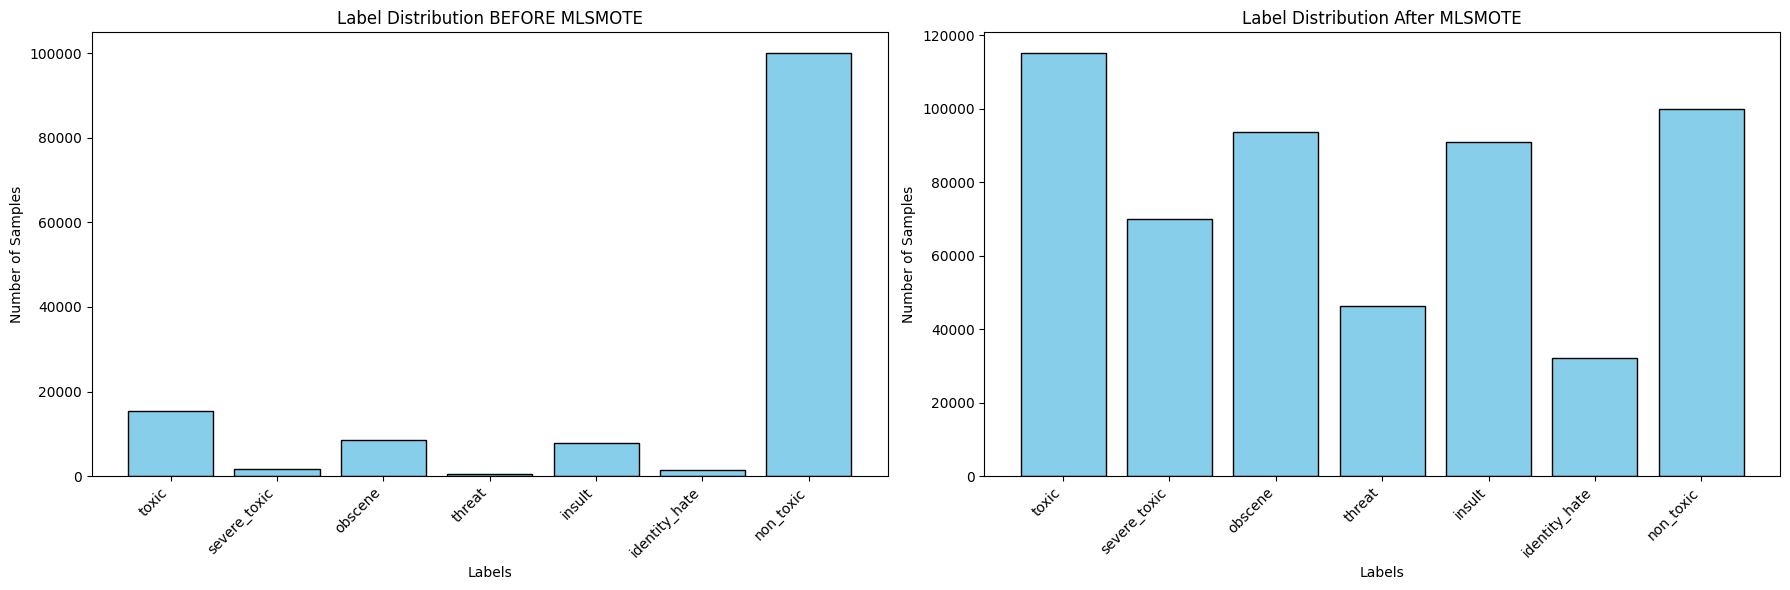

In [ ]:
#Plotting the new distribution sample
O_count=Y.sum(axis=0)
fig,axes = plt.subplots(1, 2, figsize=(18,6))
x_positions=np.arange(len(label_columns))
axes[0].bar(x_positions,O_count,color='skyblue',edgecolor='black')
axes[0].set_xticks(x_positions)
axes[0].set_xticklabels(label_columns, rotation=45, ha='right')
axes[0].set_title('Label Distribution BEFORE MLSMOTE')
axes[0].set_xlabel('Labels')
axes[0].set_ylabel('Number of Samples')

axes[1].bar(x_positions,final_counts,color='skyblue',edgecolor='black')
axes[1].set_xticks(x_positions)
axes[1].set_xticklabels(label_columns, rotation=45, ha='right')

axes[1].set_title('Label Distribution After MLSMOTE')
axes[1].set_xlabel('Labels')
axes[1].set_ylabel('Number of Samples')
plt.tight_layout()
plt.show()


Saving our datasets

In [ ]:
import pandas as pd
X_resampled_df = pd.DataFrame(X_current)
Y_resampled_df = pd.DataFrame(Y_current)
X_resampled_df.to_csv('X_resampled.csv', index=False)
Y_resampled_df.to_csv('Y_resampled.csv', index=False)
from google.colab import files
files.download('X_resampled.csv')
files.download('Y_resampled.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MODELLING

5.1 Splitting Our Dataset

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
datadir = "/content/"
X_current= pd.read_csv(datadir+'X_resampled.csv')
Y_current= pd.read_csv(datadir+'Y_resampled.csv')

Transfer the sparse matrix to dense array

In [ ]:
import re
import numpy as np
import pandas as pd

def parse_sparse_dataframe(df):
    numeric_values = []
    for index, row in df.iterrows():  # Iterate over DataFrame rows
        data_string = row[0]  # Get the string representation of the sparse data
        # Remove ellipses and extra whitespace
        data_string = data_string.replace('...', '').strip()
        # Regular expression to find numeric values
        pattern = r'\(0, \d\)\t(-?[0-9.]+)'
        # Find all matches
        matches = re.findall(pattern, data_string)
        # Convert matches to float and extend the list
        if matches:
            numeric_values.extend([float(match) for match in matches])

    # Reshape to 2D array with correct number of columns
    num_cols = len(re.findall(pattern, df.iloc[0, 0].replace('...', '').strip()))
    numeric_values = np.array(numeric_values).reshape(-1, num_cols)
    return numeric_values

# Call the function
result = parse_sparse_dataframe(X_current)
print(result.shape)

<ipython-input-10-28fa3ee5e617>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data_string = row[0]  # Get the string representation of the sparse data


(216225, 10)


Saving the handle results

In [ ]:
result_df.to_csv('result.csv', index=False)
from google.colab import files
files.download('result.csv')

NameError: name 'result_df' is not defined

Directly upload the handle daataset

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
from google.colab import drive
datadir = "/content/"
result= pd.read_csv(datadir+'result.csv')
result_df = pd.DataFrame(result)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(result, Y_current, test_size=0.2, random_state=42)

# 5.2.1 Building FNN Model（Baseline）



In [ ]:
import os
from scipy.sparse import issparse
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
import tensorflow as tf

os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices=0'

num_labels = Y_train.shape[1]

def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))

    hp_units = hp.Int('units', min_value=32, max_value=512, step=64)
    hp_activation = hp.Choice('activation', values=['relu', 'tanh', 'sigmoid', 'elu', 'selu', 'swish'])
    model.add(Dense(hp_units, activation=hp_activation))

    hp_dropout = hp.Float('dropout', min_value=0.1, max_value=0.8, step=0.1)
    model.add(Dropout(hp_dropout))

    model.add(Dense(num_labels, activation='sigmoid'))

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='accuracy',
    max_trials=20,
    executions_per_trial=1,
    directory='tuning_results',
    project_name='mlp_tuning'
)

try:
    tuner.search(X_train, Y_train, epochs=10, validation_split=0.2, batch_size=32)
except Exception as e:
    print("Error during tuner.search:", str(e))


Trial 20 Complete [00h 01m 19s]
accuracy: 0.7650667428970337

Best accuracy So Far: 0.7955543994903564
Total elapsed time: 01h 03m 39s


5.2.2 Selecting the best FNN model

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters:")
print(f"Units: {best_hps.get('units')}")
print(f"activation:{best_hps.get('activation')}")
print(f"Dropout: {best_hps.get('dropout')}")
print(f"Learning rate: {best_hps.get('learning_rate')}")

Best hyperparameters:
Units: 352
activation:relu
Dropout: 0.6
Learning rate: 0.0001


Validation Score for FNN models

In [ ]:
import matplotlib.pyplot as plt
trials=tuner.oracle.get_best_trials(num_trials=20)
results=[]
for t in trials:
    hp_values=t.hyperparameters.values
    score=t.score
    hp_values['score']=score
    results.append(hp_values)

df = pd.DataFrame(results)
plt.figure(figsize=(10,6))
plt.plot(df.index, df['score'], marker='o', linestyle='-', label='Validation Score', color='blue')

plt.title('Hyperparameter Tuning Results')
plt.xlabel('Trial')
plt.ylabel('Validation Score')
plt.xticks(df.index)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'tuner' is not defined

5.2.3 Evaluating the selected FNN model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
fnn_model=Sequential([Dense(352,activation='relu'),Dropout(0.6),Dense(num_labels,activation='sigmoid')])
fnn_model.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])
Y_pred = (fnn_model.predict(X_test)>0.5).astype(int)

1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


Classification_report of selected FNN model

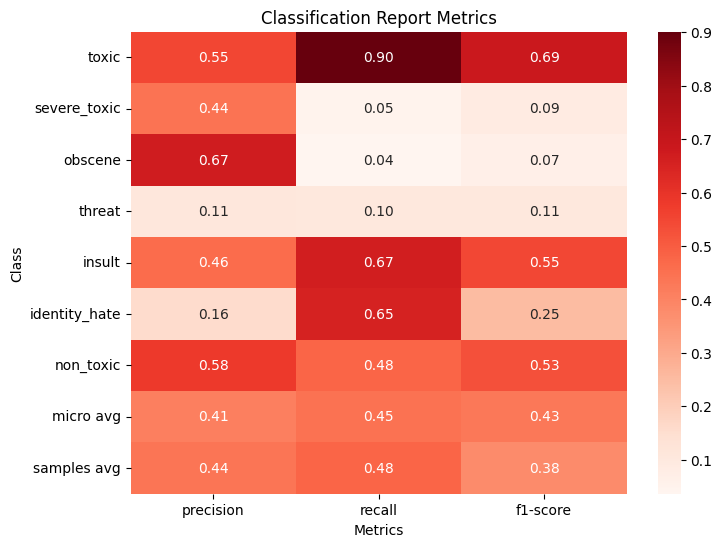

In [ ]:
import seaborn as sns

report= classification_report(Y_test, Y_pred, target_names=label_columns, zero_division=0,output_dict=True)
class_report_df = pd.DataFrame(report).transpose()

#Dropping irrelevant metrics for Visualization
class_metrics = class_report_df.drop(['macro avg', 'weighted avg'])

#Classification Metrics Using Heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(class_metrics[['precision', 'recall', 'f1-score']], annot = True, cmap = 'Reds', fmt = '.2f',yticklabels=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'non_toxic','micro avg','samples avg'])
plt.title("Classification Report Metrics")
plt.xlabel("Metrics")
plt.ylabel("Class")
plt.yticks(rotation = 0)
plt.show()

AUC_ROC Curves of selected FNN model

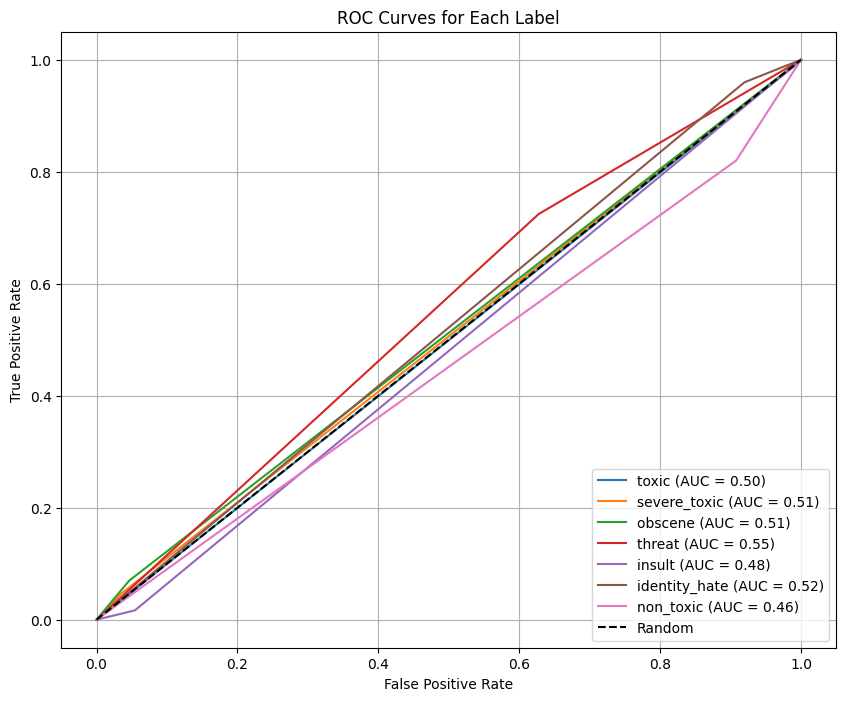

In [ ]:
plt.figure(figsize=(10, 8))
for i, label in enumerate(label_columns):
    fpr, tpr, _ = roc_curve(Y_test.iloc[:, i], Y_pred[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random')

plt.title('ROC Curves for Each Label')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

5.3.1 Building logistic Regression(Baseline)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from scipy.stats import uniform

if isinstance(X_train, pd.DataFrame):
    X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
    X_train = csr_matrix(X_train.values)

scorer=make_scorer(f1_score,average='micro')
param_grid = {
    'estimator__C': [0.01, 0.1, 1, 10, 100],
    'estimator__penalty': ['l1','l2'],
    'estimator__solver': ['saga'],
    'estimator__max_iter': [100, 300, 500,1000]
}
log_reg = LogisticRegression()
multi_label_clf = OneVsRestClassifier(log_reg)
grid_search = GridSearchCV(
    estimator=multi_label_clf,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, Y_train)
grid_search.fit(X_train, Y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


ValueError: 
All the 200 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py", line 370, in fit
    self.estimators_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose)(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 74, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1918, in __call__
    return output if self.return_generator else list(output)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1847, in _get_sequential_output
    res = func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 136, in __call__
    return self.function(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py", line 93, in _fit_binary
    estimator.fit(X, y, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1223, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1301, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1058, in check_array
    raise ValueError(
ValueError: Found array with dim 3. LogisticRegression expected <= 2.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
result=grid_search.cv_results_
param_values = results['param_estimator__C']
mean_scores = results['mean_test_score']
std_scores = results['std_test_score']
param_values = np.array(param_values, dtype=float)

plt.figure(figsize=(8, 6))
plt.plot(param_values, mean_scores, marker='o', label='Mean Test Score')
plt.fill_between(param_values, mean_scores - std_scores, mean_scores + std_scores, alpha=0.2, label='± 1 Std. Dev.')

plt.xscale('log')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Cross-Validated Score')
plt.title('Grid Search Optimization Process')
plt.legend()
plt.grid()
plt.show()

NameError: name 'grid_search' is not defined

5.3.2 Training the selected logistic model

In [ ]:
log_reg_best=LogisticRegression(C=100,max_iter=1000,penalty='l2',solver='saga')
log_clf=OneVsRestClassifier(log_reg_best)
log_clf.fit(X_train,Y_train)


ValueError: Found array with dim 3. LogisticRegression expected <= 2.

5.3.3 Evaluating the selected logistic model

Classification_report

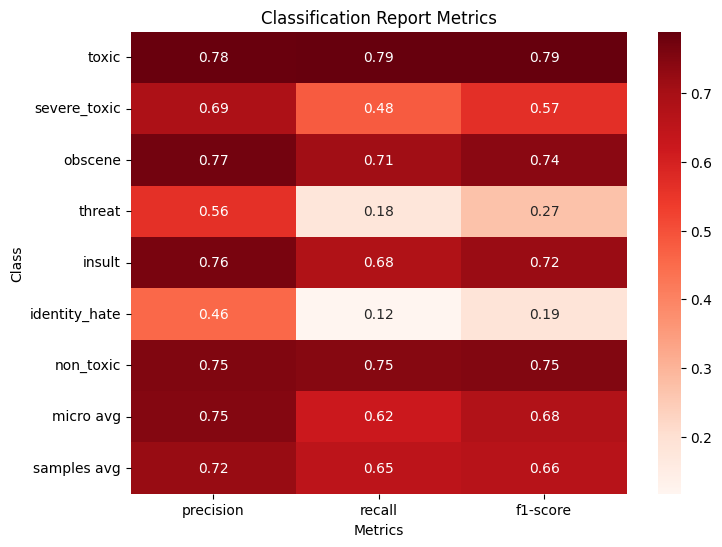

In [ ]:
import seaborn as sns
Y_pred = (log_clf.predict(X_test)>0.5).astype(int)
report= classification_report(Y_test, Y_pred, target_names=label_columns, zero_division=0,output_dict=True)
class_report_df = pd.DataFrame(report).transpose()

#Dropping irrelevant metrics for Visualization
class_metrics = class_report_df.drop(['macro avg', 'weighted avg'])

#Classification Metrics Using Heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(class_metrics[['precision', 'recall', 'f1-score']], annot = True, cmap = 'Reds', fmt = '.2f',yticklabels=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'non_toxic','micro avg','samples avg'])
plt.title("Classification Report Metrics")
plt.xlabel("Metrics")
plt.ylabel("Class")
plt.yticks(rotation = 0)
plt.show()

AUC_ROC Curves

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
Y_prob = log_clf.predict_proba(X_test)
plt.figure(figsize=(10, 8))
for i, label in enumerate(label_columns):
    if Y_prob.shape[1] == len(label_columns):
        fpr, tpr, _ = roc_curve(Y_test.iloc[:, i], Y_prob[:, i])
        auc_score = roc_auc_score(Y_test.iloc[:, i], Y_prob[:, i])
    elif Y_prob.shape[1] == 1:
        fpr, tpr, _ = roc_curve(Y_test.iloc[:, i], Y_prob[:, 0])
        auc_score = roc_auc_score(Y_test.iloc[:, i], Y_prob[:, 0])
    else:
        raise ValueError("Unexpected shape for predicted probabilities. Please check your model's output.")
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.title('ROC Curves for Each Label')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

NameError: name 'log_clf' is not defined

5.4.1 Building BI_GRU Regression

Reshape the dataset for BI_GRU Model

In [ ]:
from sklearn.model_selection import train_test_split
timesteps = 5
stride = 1
sequence_data = []
for i in range(0, len(result) - timesteps + 1, stride):
    sequence_data.append(result[i:i + timesteps])
X_gru_input = np.array(sequence_data)
aligned_Y_current = Y_current[:X_gru_input.shape[0]]
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_gru_input,aligned_Y_current,test_size=0.2, random_state=42)

In [ ]:
print("X_train shape:", X_train1.shape)
print("X_test shape:", X_test1.shape)

X_train shape: (172976, 5, 10)
X_test shape: (43245, 5, 10)


In [ ]:
import optuna
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Bidirectional, GRU, Dropout, Dense,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Reshape, Bidirectional, GRU
from tensorflow.keras.callbacks import EarlyStopping
def objective(trial):
    units = trial.suggest_int("units", 64, 256, step=32)
    dropout_rate = trial.suggest_float("dropout_rate", 0.5, 0.7, step=0.1)
    bidirectional = trial.suggest_categorical("bidirectional", [True, False])
    # build model
    model = Sequential()
    model.add(Input(shape=(X_train1.shape[1], X_train1.shape[2])))
    if bidirectional:
        model.add(Bidirectional(GRU(units, return_sequences=False)))
    else:
        model.add(GRU(units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(7, activation="sigmoid"))

    # compile model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss="binary_crossentropy",
                  metrics=["accuracy"])

    # setting early stop
    early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

    # training model
    history = model.fit(
        X_train1, Y_train1,
        validation_data=(X_test1, Y_test1),
        epochs=10,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=0  #reduce logs
    )
    val_accuracy = max(history.history["val_accuracy"])
    return val_accuracy
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)
print("\nBest hyperparameters:")
print(study.best_params)

[I 2024-12-12 03:18:15,158] A new study created in memory with name: no-name-fd452b00-1c9a-4e28-8526-2ada4a503872
[W 2024-12-12 03:18:21,307] Trial 0 failed with parameters: {'units': 96, 'dropout_rate': 0.7, 'bidirectional': False} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-16-f402fb993baf>", line 31, in objective
    history = model.fit(
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit
    logs = self.train_function(iterator)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/lo

KeyboardInterrupt: 

5.4.2 Training the selected Bi-GRU model

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Bidirectional, GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import log_loss
BI_GRU_model = Sequential([
    Input(shape=(X_train1.shape[1], X_train1.shape[2])),
    Bidirectional(GRU(64, return_sequences=True)),
    Bidirectional(GRU(64, return_sequences=True)),
    Bidirectional(GRU(64, return_sequences=False)),
    Dropout(0.5),
    Dense(7)
])

BI_GRU_model.compile(optimizer=Adam(learning_rate=0.001),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

history = BI_GRU_model.fit(X_train1, Y_train1,
                           validation_data=(X_test1, Y_test1),
                           epochs=20,
                           batch_size=64)


logits_val = BI_GRU_model.predict(X_test1)

logits_val_tensor = torch.tensor(logits_val, dtype=torch.float32)
labels_val_tensor = torch.tensor(Y_test1.values, dtype=torch.float32)

class TemperatureScaling(nn.Module):
    def __init__(self):
        super(TemperatureScaling, self).__init__()
        self.temperature = nn.Parameter(torch.ones(1) * 1.0)

    def forward(self, logits):
        return logits / self.temperature  #apply temperature scaling

    def calibrate(self, logits, labels):
        criterion = nn.BCEWithLogitsLoss()  # apply binary_crossentropy
        optimizer = optim.LBFGS([self.temperature], lr=0.01, max_iter=50)
        def closure():
            optimizer.zero_grad()
            loss = criterion(self.forward(logits), labels)
            loss.backward()
            return loss

        optimizer.step(closure)
        return self.temperature.item()

# initial temperature scaling
temp_scaler = TemperatureScaling()

# temperature optimal
optimal_temperature = temp_scaler.calibrate(logits_val_tensor, labels_val_tensor)
print(f"Optimal Temperature: {optimal_temperature}")

#
logits_val_calibrated = temp_scaler(logits_val_tensor).detach().numpy()
probabilities_val_calibrated = torch.sigmoid(torch.tensor(logits_val_calibrated)).numpy()

# log_loss
log_loss_before = log_loss(Y_test1, torch.sigmoid(torch.tensor(logits_val)).numpy())
log_loss_after = log_loss(Y_test1, probabilities_val_calibrated)
print(f"Log Loss Before Calibration: {log_loss_before}")
print(f"Log Loss After Calibration: {log_loss_after}")

# bi_gru_model
logits_test = BI_GRU_model.predict(X_test1)
logits_test_tensor = torch.tensor(logits_test, dtype=torch.float32)

#logits_test
logits_test_calibrated = temp_scaler(logits_test_tensor).detach().numpy()
probabilities_test_calibrated = torch.sigmoid(torch.tensor(logits_test_calibrated)).numpy()

# probability_test_calibrated
predictions = (probabilities_test_calibrated > 0.5).astype(int)

print("Predictions complete!")


Epoch 1/20
2703/2703 ━━━━━━━━━━━━━━━━━━━━ 32s 10ms/step - accuracy: 0.8148 - loss: 0.5724 - val_accuracy: 0.9273 - val_loss: 0.3270
Epoch 2/20
2703/2703 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - accuracy: 0.8944 - loss: 0.3945 - val_accuracy: 0.5865 - val_loss: 1.5054
Epoch 3/20
2703/2703 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - accuracy: 0.6433 - loss: 1.0410 - val_accuracy: 0.9244 - val_loss: 0.3826
Epoch 4/20
2703/2703 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - accuracy: 0.8699 - loss: 0.4863 - val_accuracy: 0.9000 - val_loss: 0.4201
Epoch 5/20
2703/2703 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.7683 - loss: 0.9319 - val_accuracy: 0.9214 - val_loss: 0.4597
Epoch 6/20
2703/2703 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.8534 - loss: 0.6094 - val_accuracy: 0.8722 - val_loss: 0.3632
Epoch 7/20
2703/2703 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.9030 - loss: 0.3753 - val_accuracy: 0.9336 - val_loss: 0.3181
Epoch 8/20
2703/2703 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.9123 -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(


1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Predictions complete!


In [ ]:
import matplotlib.pyplot as plt
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy using TemperatureScaling')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'history' is not defined

5.4.3 Evaluting the selected Bi_GRU model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
Y_pred1 = (BI_GRU_model.predict(X_test1) > 0.5).astype(int)

1352/1352 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


Classification_report

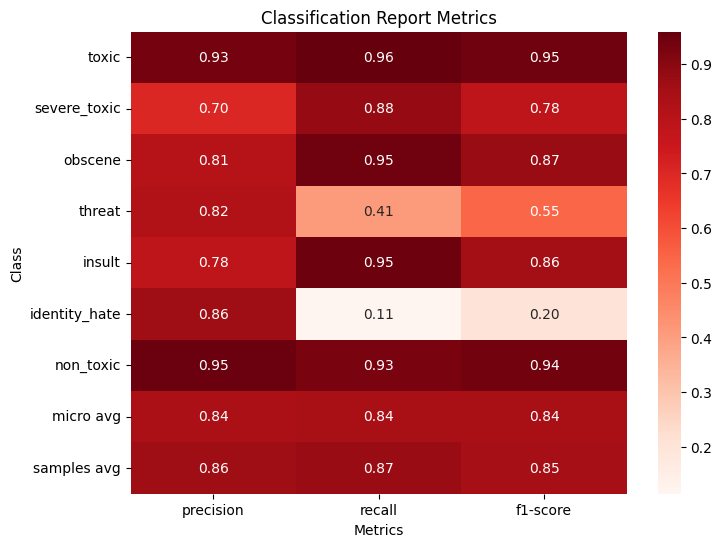

In [ ]:
import seaborn as sns
label_columns=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate','non_toxic']
report= classification_report(Y_test1, Y_pred1, target_names=label_columns, zero_division=0,output_dict=True)
class_report_df = pd.DataFrame(report).transpose()
#Dropping irrelevant metrics for Visualization
class_metrics = class_report_df.drop(['macro avg', 'weighted avg'])
#Classification Metrics Using Heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(class_metrics[['precision', 'recall', 'f1-score']], annot = True, cmap = 'Reds', fmt = '.2f',yticklabels=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'non_toxic','micro avg','samples avg'])
plt.title("Classification Report Metrics")
plt.xlabel("Metrics")
plt.ylabel("Class")
plt.yticks(rotation = 0)
plt.show()

AUC_ROC Curves

1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


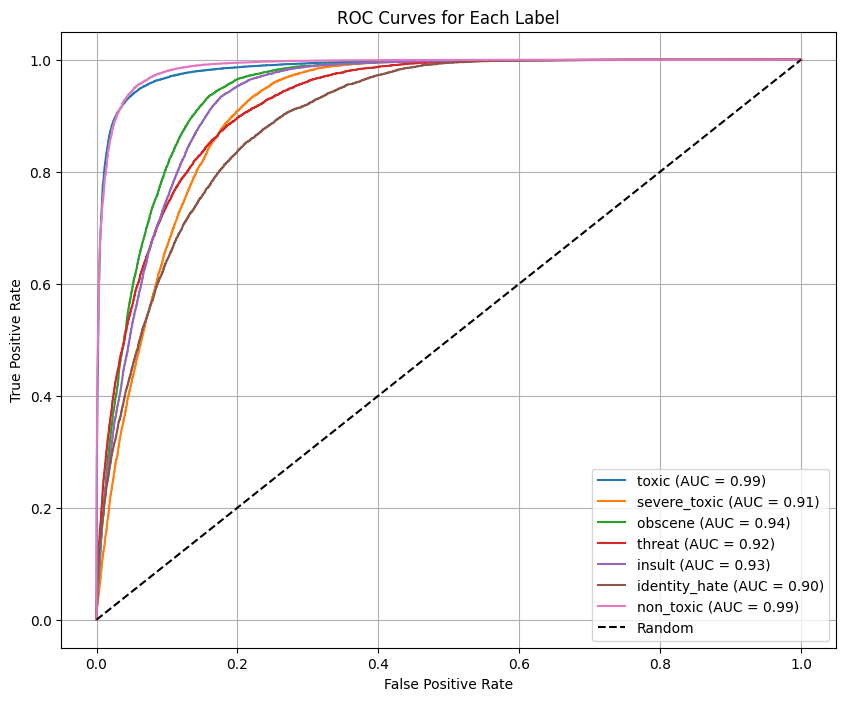

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
Y_pred = BI_GRU_model.predict(X_test1)
plt.figure(figsize=(10, 8))
for i, label in enumerate(label_columns):
    if Y_prob.shape[1] == len(label_columns):
        fpr, tpr, _ = roc_curve(Y_test1.iloc[:, i], Y_pred[:, i])
        auc_score = roc_auc_score(Y_test1.iloc[:, i], Y_pred[:, i])
    elif Y_prob.shape[1] == 1:
        fpr, tpr, _ = roc_curve(Y_test1.iloc[:, i], Y_pred[:, 0])
        auc_score = roc_auc_score(Y_test1.iloc[:, i], Y_pred[:, 0])
    else:
        raise ValueError("Unexpected shape for predicted probabilities. Please check your model's output.")
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.title('ROC Curves for Each Label')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()